## Почему хорошосжимается txt-файл

In [101]:
f = open('credit.csv', 'rb').read()
print (len(f))
fr = open('credit.rar', 'rb').read()
print (len(fr))


93763
12544


In [102]:
def p(f):
    """
    Вычисляет вероятности символов [0..255] в файле f
    """
    c = [0]*256
    for b in f:
        c[b] += 1
    return list(map(lambda x: x / len(f), c))

In [103]:
c = p(f)
c[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [104]:
cr = p(fr)
cr[:10]

[0.006855867346938775,
 0.004942602040816327,
 0.005022321428571429,
 0.003268494897959184,
 0.004065688775510204,
 0.004145408163265306,
 0.0034279336734693877,
 0.00430484693877551,
 0.003985969387755102,
 0.004384566326530612]

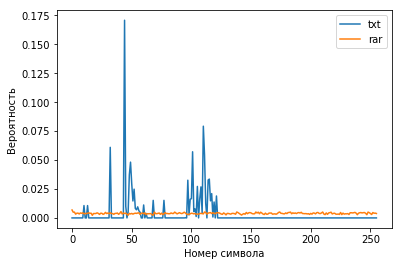

In [105]:
%matplotlib inline

import matplotlib.pyplot as plt 
plt.plot(c)
plt.plot(cr)
plt.xlabel('Номер символа')
plt.ylabel('Вероятность')
plt.legend(['txt', 'rar'])

plt.show()

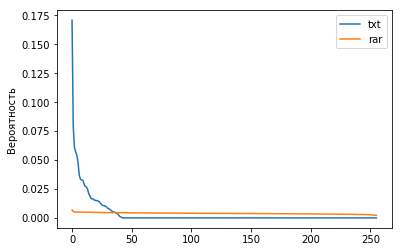

In [106]:
c.sort(key = lambda x: -x)
cr.sort(key = lambda x: -x)
plt.plot(c)
plt.plot(cr)
plt.ylabel('Вероятность')
plt.legend(['txt', 'rar'])


In [107]:
def entropy(a):
    from math import log
    return -sum([p*log(p,2) if p > 0 else 0 for p in a])

In [108]:
print ("Исходный файл. Энтропия \t= %5.3f" % (entropy(c)))
print ("Сжатый файл. Энтропия \t\t= %5.3f" % (entropy(cr)))
print()
print ("Степень сжатия. Исходный файл \t= %5.3f" % (100 * entropy(c) / 8))
print ("Степень сжатия. Сжатый файл \t= %5.3f" % (100 * entropy(cr) / 8))

Исходный файл. Энтропия 	= 4.693
Сжатый файл. Энтропия 		= 7.982

Степень сжатия. Исходный файл 	= 58.666
Степень сжатия. Сжатый файл 	= 99.773
